In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

In [2]:
data = pd.read_csv('column_2C_weka.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# EDA

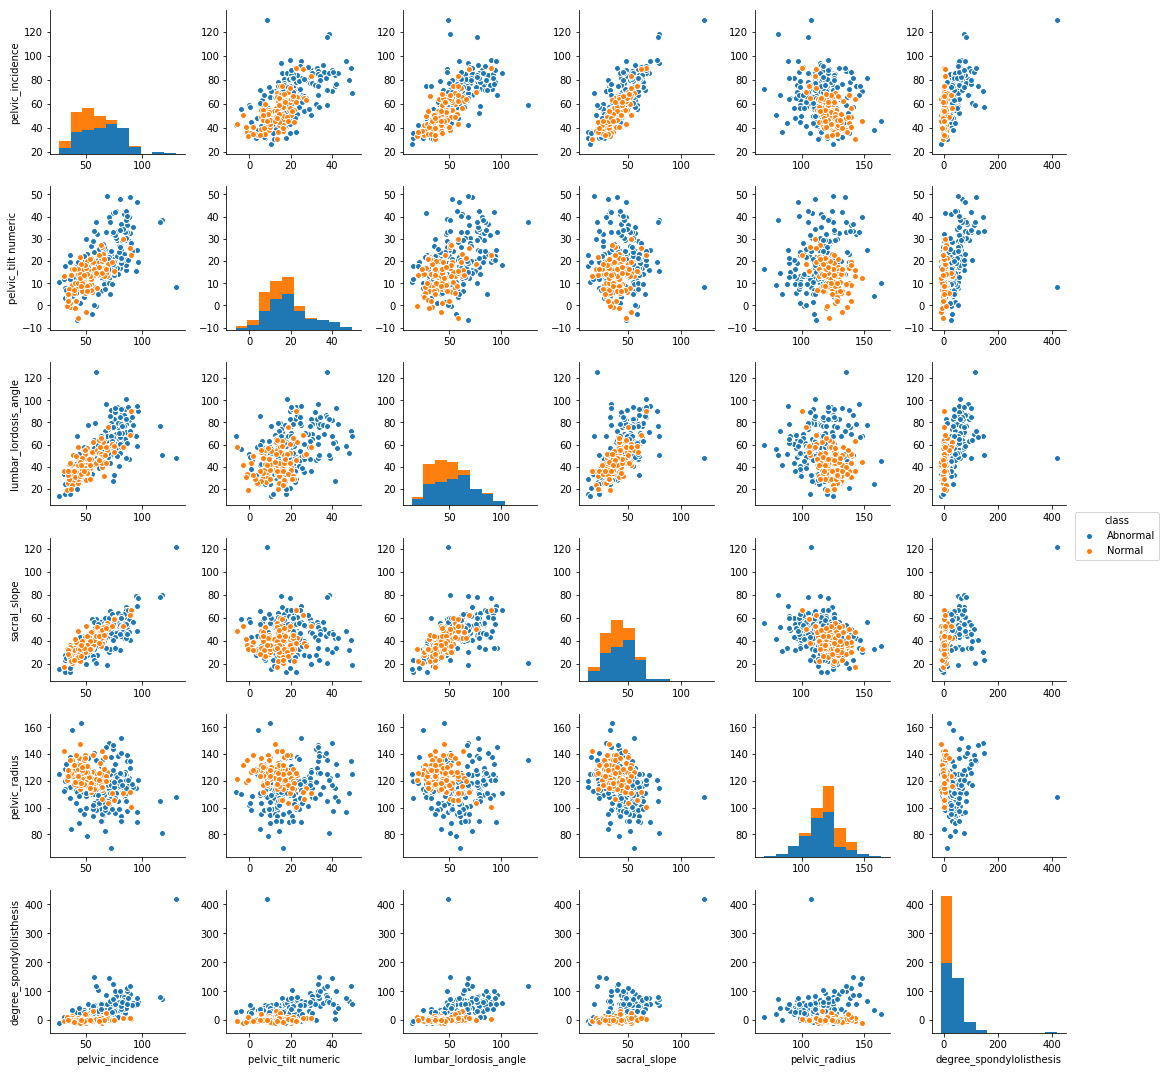

In [7]:
sns.pairplot(data,hue='class')

Abnormal    210
Normal      100
Name: class, dtype: int64

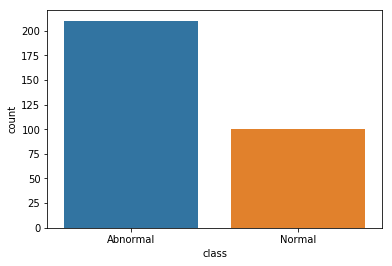

In [8]:
sns.countplot(x='class',data=data)
data['class'].value_counts()

# Train Test Split and Evaluation

In [9]:
X = data.drop('class',axis=1)
Y = data['class']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

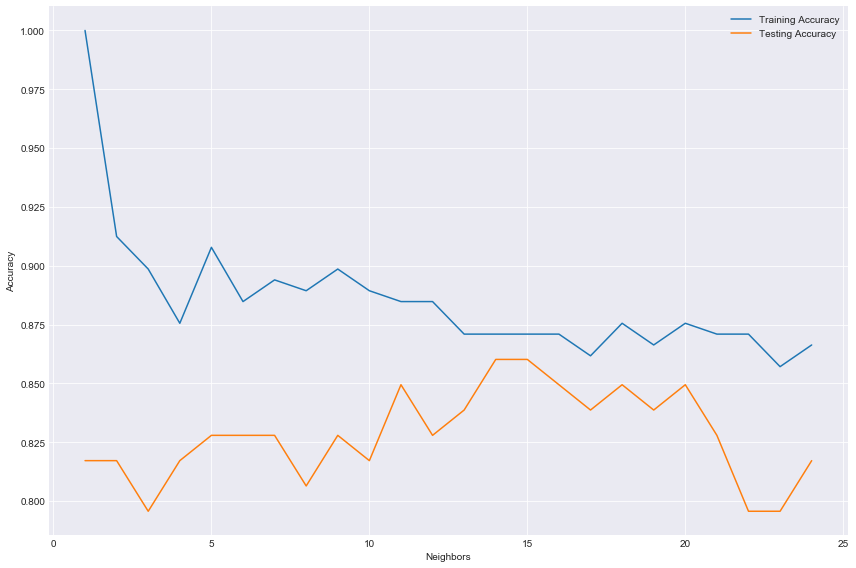

Best Testing Accuracy is 0.860215053763 with K = 14


In [10]:
#KNN
neighbors = np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
print 'Best Testing Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy)))

In [11]:
# knn = KNeighborsClassifier(n_neighbors=14)
# knn.fit(x_train,y_train)
# predictions = knn.predict(x_test)
# print classification_report(y_test,predictions)
# confusion_matrix(y_test,predictions)

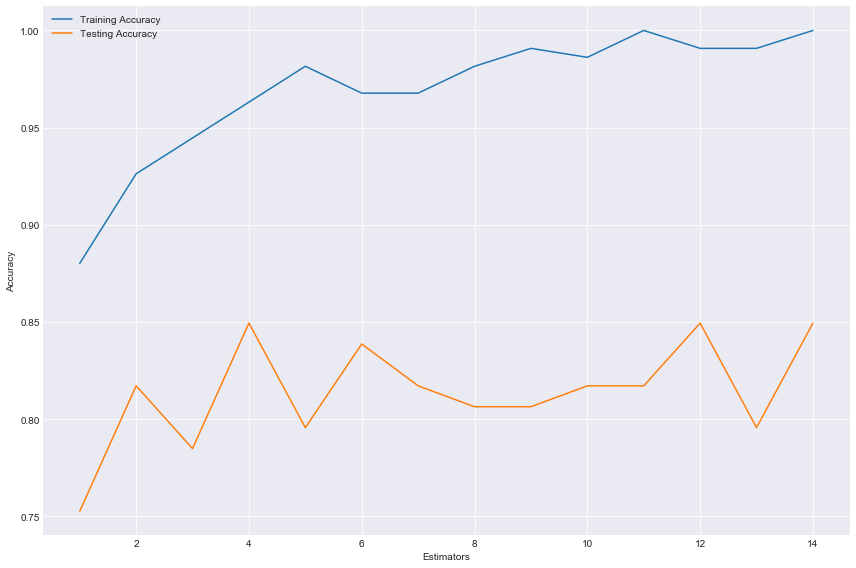

Best Accuracy is 0.849462365591 with n =4


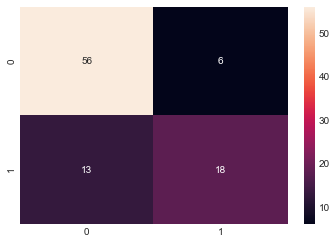

In [12]:
#Random Forests
estimators = np.arange(1,15) #because of small dataset
train_acc = []
test_acc = []
for i,k in enumerate(estimators):
    rfc =RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train,y_train)
    train_acc.append(rfc.score(x_train,y_train))
    test_acc.append(rfc.score(x_test,y_test))

#plotting    
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(estimators,train_acc,label='Training Accuracy')
plt.plot(estimators,test_acc,label='Testing Accuracy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
best_score = np.max(test_acc)
best_n_estimators= 1+test_acc.index(np.max(test_acc)) # index starts from 0
print 'Best Accuracy is {} with n ={}'.format(best_score,best_n_estimators)

#check
rfc = RandomForestClassifier(n_estimators=best_n_estimators)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
#confusion Matrix
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
 


             precision    recall  f1-score   support

          0       0.72      0.74      0.73        31
          1       0.87      0.85      0.86        62

avg / total       0.82      0.82      0.82        93



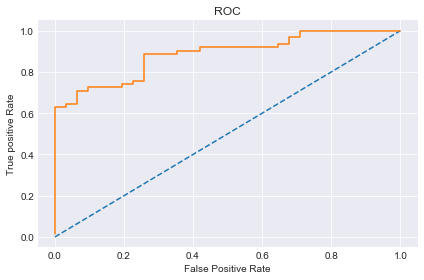

In [13]:
#Logistic Regression
#output is logistic regression is probability : 
binary_y_train = pd.Series(pd.get_dummies(y_train).drop('Normal',axis=1)['Abnormal'],index=y_train.index)
binary_y_test = pd.Series(pd.get_dummies(y_test).drop('Normal',axis=1)['Abnormal'],index=y_test.index)
logmodel = LogisticRegression()
logmodel.fit(x_train,binary_y_train)
y_pred = logmodel.predict(x_test)
print classification_report(binary_y_test,y_pred)

#ROC
y_pred_prob = logmodel.predict_proba(x_test)[:,1] #not features 
fpr,tpr,threshold = roc_curve(binary_y_test,y_pred_prob)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC')
plt.legend()
plt.tight_layout()
plt.show()